## Cahn-Hilliard Animation

In [3]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from CHeq_class import CH_lattice

%matplotlib inline
from IPython.display import clear_output

In [4]:
# fixed parameters
n = 50
dx, dt = [1, 1]
a, M, kappa = [0.1, 0.1, 0.1]
T_array = np.arange(0, 1000000, 1) # simulation timestep

# initial condition
phi_0 = 0.
noise = random.uniform(low=-0.1, high=0.1, size=(n,n)) 
lattice = phi_0 + noise
system = CH_lattice(lattice, a, kappa, M, dx, dt)

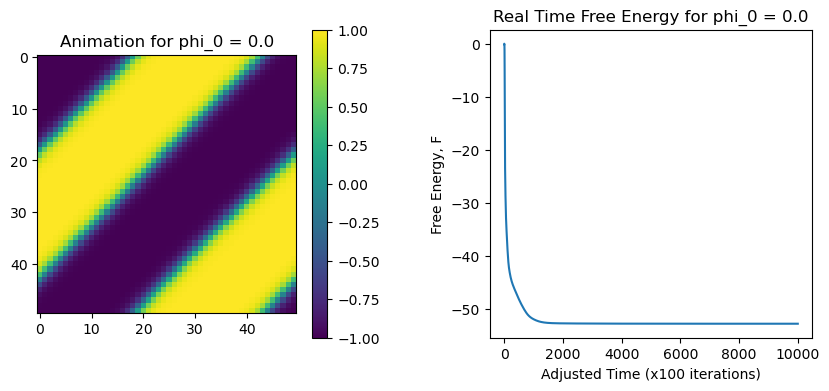

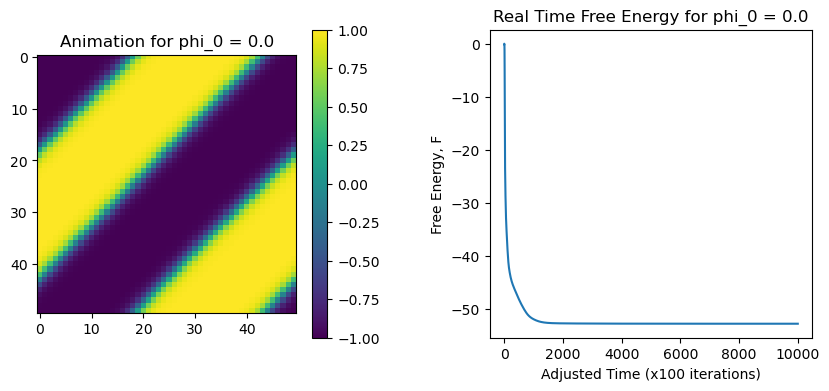

In [5]:
F_array = []
sweep_array = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)
im = ax1.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
fig.colorbar(im, ax=ax1)
line, = ax2.plot([], [])  # empty line plot to start

t_counter = 0

for t in T_array:
    system.lattice = system.update_step()
    F_energy = system.compute_F()

    # animation
    if(t%100==0):
        #print(system.lattice[10][10])
        t_counter += 1

        F_array.append(F_energy)
        sweep_array.append(t_counter)

        # animation
        ax1.cla()
        im=ax1.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
        ax1.set_title(f'Animation for phi_0 = {phi_0}')

        # update states graph
        ax2.cla()  # clear the axes
        ax2.plot(sweep_array, F_array)
        ax2.relim()  # recalculate limits
        ax2.autoscale_view()  # autoscale the view
        ax2.set_title(f'Real Time Free Energy for phi_0 = {phi_0}')
        ax2.set_xlabel('Adjusted Time (x100 iterations)')
        ax2.set_ylabel('Free Energy, F')

        clear_output(wait=True)
        display(fig)

In [4]:
data = {"Free_Energy": F_array,
        "Adjusted_Time": sweep_array
}       
np.save("CH_phi_0data",data)